Introdução ao NumPy 
===========

O tipo *ndarray*
--------------------


O tipo *ndarray*, ou apenas *array* é um arranjo de itens homogêneos de dimensionalidade N, indexados por uma tupla de N inteiros. Existem 3 informações essenciais associadas ao *ndarray*: o tipo dos dados, suas dimensões e seus dados em si. A propriedade *dtype* permite saber o tipo de dados
enquanto que *shape* é uma tupla que indica o tamanho de cada dimensão do arranjo. O acesso aos dados em si deve ser feito por indexação, por fatiamento ou pela variável em si. 


Existem várias maneiras de criar uma variável do tipo *ndarray*.
Por exemplo, é possível criar uma a partir de uma lista (1D) ou lista de listas usando a função *array*. 
O tipo de matriz resultante é deduzida a partir do tipo de elementos nas sequências.

Veja a seguir um vetor de inteiros com 5 elementos. Note que o vetor é uma linha com 5 colunas. Observe também que o shape é uma tupla de um único elemento (veja a vírgula que aparece por ser uma tupla).


In [1]:
import numpy as np
a = np.array( [2,3,4,-1,-2] )
print 'Dimensões: a.shape=', a.shape
print 'Tipo dos elementos: a.dtype=', a.dtype
print 'Imprimindo o array completo:\n a=',a

Dimensões: a.shape= (5,)
Tipo dos elementos: a.dtype= int64
Imprimindo o array completo:
 a= [ 2  3  4 -1 -2]


Veja a seguir uma matriz bidimensional de dados ponto flutuante de 2 linhas e 3 colunas. Observe que a tupla do shape aumenta para a esquerda,
isto é, se eu tiver um vetor de 3 elementos, o seu shape é (3,) e se uma nova dimensão for adicionada, por exemplo 2 linhas e 3 colunas, o
shape passa a ser (3,2). O que antes shape[0] no vetor unidimensional era colunas, já na matriz bidimensional shape[0] passou a ser o número
de linhas.
Assim o último elemento da tupla do ``shape`` indica o número de colunas, a penúltima o número de linhas. Assim se quisermos sempre buscar
o número de colunas, independentemente do número de dimensões, shape[-1] informa sempre o número de colunas, shape[-2], o número de linhas.

In [2]:
b = np.array( [ [1.5, 2.3, 5.2],
                [4.2, 5.6, 4.4] ] )
print 'Um array bidimensional, dimensões:(b.shape=', b.shape
print 'Tipo dos elementos: b.dtype', b.dtype
print 'Número de colunas:', b.shape[-1]
print 'Número de linhas:', b.shape[-2]
print 'Elementos, b=\n', b

Um array bidimensional, dimensões:(b.shape= (2, 3)
Tipo dos elementos: b.dtype float64
Número de colunas: 3
Número de linhas: 2
Elementos, b=
[[ 1.5  2.3  5.2]
 [ 4.2  5.6  4.4]]


Manipulação de arrays
=====================

Criando arrays inicializados
-------------------------------

É possível criar arrays de zeros, uns ou valores não inicializados usando as funções *zeros*, *ones* ou *empty*. As dimensões
do array são obrigatórias e é dado por uma tupla e o tipo dos elementos é opcional, sendo que o default é tipo float. 

O código a seguir cria 3 arrays. O primeiro possui 2 linhas e 4 colunas. O segundo tem 3 dimensões: 3 fatias (ou imagens) onde cada
uma tem 2 linhas e 5 colunas. Por último, é criado uma matriz booleana (True e False) de valores não inicializados 
de 2 linhas e 3 colunas. A vantagem do *empty* é que ele é mais rápido que o *zeros* ou *ones*. No caso abaixo, os valores
mostrados na matrix criada pelo *empty* são aleatórios.

In [3]:
d = np.zeros( (2,4) )
print 'Array de 0s: \n', d

d = np.ones( (3,2,5), dtype='int16' )    
print '\n\nArray de 1s: \n', d

d = np.empty( (2,3), 'bool' )
print 'Array não inicializado (vazio):\n', d

Array de 0s: 
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


Array de 1s: 
[[[1 1 1 1 1]
  [1 1 1 1 1]]

 [[1 1 1 1 1]
  [1 1 1 1 1]]

 [[1 1 1 1 1]
  [1 1 1 1 1]]]
Array não inicializado (vazio):
[[False False False]
 [False False False]]


Note que o Numpy permite arrays n-dimensionais. Em imagens em níveis de cinza iremos trabalhar com matrizes bidimensionais mas
se a imagem for colorida, iremos representá-la em 3 canais, R, G e B, representados na estrutura com 3 dimensões. 
Se for um vídeo, isto é, uma sequência de imagens, teremos que adicionar mais uma dimensão. 
Se for uma tomografia, também podemos representar em 3 dimensões: largura, altura e profundidade.
    
Criando arrays com valores sequenciais
=======================================

As funções *arange* e *linspace* geram um vetor sequencial. Eles diferem apenas nos parâmetros. Enquanto o *arange* gera uma sequência a partir dos valores inicial (includente e opcional), final( excludente) e passo (opcional), *linspace* gera uma sequência com valores inicial e final e número de elementos. Note as diferenças nos exemplos a seguir:


In [4]:
print 'np.arange( 10) = ', np.arange(10)
print 'np.arange( 3, 8) = ', np.arange(3,8)
print 'np.arange( 0, 2, 0.5) = ', np.arange(0, 2, 0.5)
print 'np.linspace( 0, 2, 5 ) = ', np.linspace( 0, 2, 5 )

np.arange( 10) =  [0 1 2 3 4 5 6 7 8 9]
np.arange( 3, 8) =  [3 4 5 6 7]
np.arange( 0, 2, 0.5) =  [ 0.   0.5  1.   1.5]
np.linspace( 0, 2, 5 ) =  [ 0.   0.5  1.   1.5  2. ]


Veja que no último caso, usando o linspace, a sequência começa em 0 e termina em 2 e deve possuir 5 elementos. Veja que
para isto o passo a ser utilizado será 0.5, calculado automaticamente. Já no exemplo anterior, a sequência começa em 0 e deve terminar antes de 2 e o passo é 0.5. 


Fatiamento em narray unidimensional
======================================


Um recurso importante do numpy é o fatiamento no qual é possível acessar
um subconjunto do array de diversas formas. O fatiamento define os índices
onde o array será acessado definindo o ponto inicial, final e o passo entre
eles, nesta ordem: [inicial:final:passo].

Inicializando um array unidimensional
========================================


In [5]:
a = np.arange(20) # a é um vetor de dimensão 20
print 'a = \n', a

a = 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


Exemplo simples de fatiamento
===============================

Para a realização do fatiamento são utilizados 3 parâmetros, colocados no local do índice do array.
Os 3 parâmetros são separados por dois pontos ":". Todos os 3 parâmetros podem ser opcionais que ocorrem
quando o valor inicial é 0, o valor final é o tamanho do array e o passo é 1. Lembrar que a ordem deles 
é: [inicial:final:passo]. Se o passo for 1 fica: [inicial:final]. Se o início for 0 fica: [:final] e se
o final for o último fica: [inicio:] e se forem todos [:].

O fatiamento é feito começando pelo primeiro valor, adicionando-se o passo até antes do último valor. Três
aspectos são extremamente importantes de serem lembrados: O índice inicial começa em zero, o índice final
nunca é atingido, o último índice utilizado é sempre o imediatamente anterior e o Numpy admite índices negativos, que
é uma indexação do último (-1) até o primeiro elemento (-W).

Os exemplos a seguir ajudam a fixar estes conceitos.

O código abaixo acessa os elementos ímpares começando de 1 até 14:

In [6]:
a = np.arange(20)
print 'Resultado da operação a[1:15:2]'
print a[1:15:2] 

Resultado da operação a[1:15:2]
[ 1  3  5  7  9 11 13]


Exemplo de fatiamento com indices negativos
=============================================

Acessando o último elemento com índice negativo
-----------------------------------------------------------------------------

O código abaixo acessa os elementos ímpares até antes do último elemento:

In [7]:
a = np.arange(20)
print 'Resultado da operação a[1:-1:2]'
print a[1:-1:2]
print 'Note que o fatiamento termina antes do último elemento (-1)' 

Resultado da operação a[1:-1:2]
[ 1  3  5  7  9 11 13 15 17]
Note que o fatiamento termina antes do último elemento (-1)


Inversão do array com step negativo (step = -1)
------------------------------------------------------

In [9]:
a = np.arange(20)
print 'Resultado da operação a[-3:2:-1]'
print a[-3:2:-1]
print  'Note que o fatiamento retorna o array invertido'
print  'Antepenúltimo até o terceiro elemento com step = -1'

Resultado da operação a[-3:2:-1]
[17 16 15 14 13 12 11 10  9  8  7  6  5  4  3]
Note que o fatiamento retorna o array invertido
Antepenúltimo até o terceiro elemento com step = -1


Fatiamento avançado
========================================

É possível realizar o fatiamento utilizando os 3 parâmetros explícitos
( o limite inferior, limite superior e o step), ou podemos suprimir algum 
desses parâmetros. Nestes casos a função toma o valor defaut: limite 
inferior = primeiro elemento, limite superior = último elemento e step = 1.


|Proposta inicial     | Equivalente |
|---------------------|-------------|
|a[0:len(a):1]        | a[:]        |
|a[0:10:1]            | a[:10]      |
|a[0:10:2]            | a[:10:2]    |
|a[2:len(a):1]        | a[2::]      |
|a[2:len(a):2]        | a[2::2]     |


Supressão do indice limite inferior
----------------------------------------------

Quando o índice do limite inferior é omitido, é subentendido que é 0:

In [10]:
a = np.arange(20)
print 'Resultado da operação a[:15:2]'
print a[:15:2]
print 'Note que o fatiamento inicia do primeiro elemento'
print 'Primeiro elemento até antes do 15o com passo duplo'

Resultado da operação a[:15:2]
[ 0  2  4  6  8 10 12 14]
Note que o fatiamento inicia do primeiro elemento
Primeiro elemento até antes do 15o com passo duplo


Supressão do indice limite superior
----------------------------------------------

Quando o índice do limite superior é omitido, fica implícito 
que é o último elemento:

In [12]:
a = np.arange(20)
print 'Resultado da operação a[1::2]'
print a[1::2]
print 'Note que o fatiamento termina último elemento'
print 'Primeiro elemento até o último com passo duplo'

Resultado da operação a[1::2]
[ 1  3  5  7  9 11 13 15 17 19]
Note que o fatiamento termina último elemento
Primeiro elemento até o último com passo duplo


Supressão do indice do step
---------------------------

O índice do step é opcional e quando não é indicado, seu valor é 1:

In [13]:
a = np.arange(20)
print 'Resultado da operação a[1:15]'
print a[1:15]
print 'Note que o fatiamento tem step unitário'
print 'Primeiro elemento até antes do 15o com passo um'

Resultado da operação a[1:15]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Note que o fatiamento tem step unitário
Primeiro elemento até antes do 15o com passo um


Todos os elementos com passo unitário
----------------------------------------------------

In [15]:
a = np.arange(20)
print 'Resultado da operação a[:]'
print a[:] 
print 'Todos os elementos com passo unitário'

Resultado da operação a[:]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Todos os elementos com passo unitário


Fatiamento no ndarray bidimensional
======================================

Um recurso importante do numpy é o fatiamento no qual é possível acessar
partes do array de diversas formas, como pode ser visto abaixo:

Inicializando um array e mudando o seu shape
---------------------------------------------------

In [17]:
a = np.arange(20) # a é um vetor unidimensional de 20 elementos
print 'a = \n', a

a = a.reshape(4,5) # a agora é um array 4x5 (4 linhas por 5 colunas)
print 'a.reshape(4,5) = \n', a

a = 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
a.reshape(4,5) = 
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


Fatiamento de linhas e colunas de um array
--------------------------------------------------

O operador **:** indica que todos os elementos naquela dimensão devem ser acessados.

In [18]:
print 'A segunda linha do array: \n', a[1,:]  # A segunda linha é o índice 1

print ' A primeira coluna do array: \n', a[:,0] # A primeira coluna corresponde ao índice 0

A segunda linha do array: 
[5 6 7 8 9]
 A primeira coluna do array: 
[ 0  5 10 15]


Fatiamento de elementos específicos de um array
------------------------------------------------------

In [19]:
print 'Acessando as linhas do array de 2 em 2 começando pelo índice 0: \n', a[0::2,:] 

print ' Acessando as linhas e colunas do array de 2 em 2 começando pela linha 0 e coluna 1: \n', a[0::2,1::2]

Acessando as linhas do array de 2 em 2 começando pelo índice 0: 
[[ 0  1  2  3  4]
 [10 11 12 13 14]]
 Acessando as linhas e colunas do array de 2 em 2 começando pela linha 0 e coluna 1: 
[[ 1  3]
 [11 13]]


Fatiamento com índices invertidos
--------------------------------------

In [20]:
b = a[-1:-3:-1,:]
print 'Acesso as duas últimas linhas do array em ordem reversa, b = a[-1:-3:-1,:] = \n',a[-1:-3:-1,:]

print 'Acesso elemento na última linha e coluna do array, a[-1,-1] = \n', a[-1,-1]

c = a[::-1,:]
print 'Invertendo a ordem das linhas do array: c = a[::-1,:] = \n', a[::-1,:]

Acesso as duas últimas linhas do array em ordem reversa, b = a[-1:-3:-1,:] = 
[[15 16 17 18 19]
 [10 11 12 13 14]]
Acesso elemento na última linha e coluna do array, a[-1,-1] = 
19
Invertendo a ordem das linhas do array: c = a[::-1,:] = 
[[15 16 17 18 19]
 [10 11 12 13 14]
 [ 5  6  7  8  9]
 [ 0  1  2  3  4]]


Copiando variáveis *ndarray*
=================


O *ndarray* foi projetado para acesso otimizado a uma grande quantidade de dados. Neste sentido, os conceitos
descritos a seguir sobre as três formas de cópias entre variáveis ditas sem cópia, cópia rasa (*shallow*) e
cópia profunda (*deep*) são fundamentais para uma codificação eficiente. Podemos dizer que um *ndarray* possui
o cabeçalho que contém dados pelas informações sobre o tipo do elemento, a dimensionalidade (*shape*) e 
passo ou deslocamento para o próximo elemento (*strides*) e os dados raster em si. A tabela
a seguir mostra a situação do cabeçalho e dos dados nos três tipos de cópias.

|Tipo                 | Cabeçalho:Type,Shape,Strides|Dados raster      | Exemplo    |
|---------------------|-----------------------------|------------------|------------|
|Sem cópia, apenas ref| apontador original          |apontador original| a = b      |
|Cópia rasa           | novo                        |apontador original|b=a.reshape |
|                     |                             |                  |slicing, a.T|
|Cópia profunda       | novo                        |novo              |a = b.copy()|

Sem cópia explícita, apenas referência
======================================

No caso abaixo, usaremos o comando normal de igual como atribuição do array *a* para o array *b*.
Verifica-se que tanto o shape como os dados de *b* são os mesmos de *a*. Tudo se passa como *b*
fosse apenas um apontador para *a*. Qualquer modificação em *b* é refletida em *a*. 

In [21]:
a = np.arange(6) 
b = a
print "a =\n",a
print "b =\n",b
b.shape = (2,3)                           # mudança no shape de b,
print "\na shape =",a.shape               # altera o shape de a

b[0,0] = -1                               # mudança no conteúdo de b
print "a =\n",a                             # altera o conteudo de a  

print "\nid de a = ",id(a)                # id é um identificador único de objeto
print "id de b = ",id(b)                  # a e b possuem o mesmo id

print 'np.may_share_memory(a,b):',np.may_share_memory(a,b)

a =
[0 1 2 3 4 5]
b =
[0 1 2 3 4 5]

a shape = (2, 3)
a =
[[-1  1  2]
 [ 3  4  5]]

id de a =  139744959902304
id de b =  139744959902304
np.may_share_memory(a,b): True


Observe que mesmo no retorno de uma função, a cópia explícita pode não acontecer. Veja o exemplo a
seguir de uma função que apenas retorna a variável de entrada:

In [22]:
def cc(a):
  return a
b = cc(a)
print "id de a = ",id(a)
print "id de b = ",id(b)
print 'np.may_share_memory(a,b):',np.may_share_memory(a,b)

id de a =  139744959902304
id de b =  139744959902304
np.may_share_memory(a,b): True


Cópia rasa
==========

A cópia rasa é muito útil e extensivamente utilizada. É usada quando se quer indexar o array original 
através da mudança de dimensionalidade ou do 
refatiamento, porém sem a necessidade de realizar uma cópia dos dados raster. Desta forma consegue-se
uma otimização no acesso ao array n-dimensional. Existem várias formas onde a cópia rasa acontece,
sendo as principais:
1) no caso do *reshape* onde o número de elementos do *ndarray* é o mesmo, porém sua dimensionalidade
é alterada; 2) no caso de fatiamento onde um subarray é indexado; 3) no caso de transposição do array;
4) no caso de linearização do raster através do *ravel()*.
entre outros.

Reshape
-------

O exemplo a seguir mostra inicialmente a criação de um vetor unidimensional sequencial sendo "visto" de
forma bidimensional ou tridimensional.

In [23]:
a = np.arange(30)
print "a =\n", a
b = a.reshape( (5, 6))
print "b =\n", b
b[:, 0] = -1
print "a =\n", a
c = a.reshape( (2, 3, 5) )
print "c =\n", c
print 'c.base is a:',c.base is a
print 'np.may_share_memory(a,c):',np.may_share_memory(a,c)

a =
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
b =
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]
a =
[-1  1  2  3  4  5 -1  7  8  9 10 11 -1 13 14 15 16 17 -1 19 20 21 22 23 -1
 25 26 27 28 29]
c =
[[[-1  1  2  3  4]
  [ 5 -1  7  8  9]
  [10 11 -1 13 14]]

 [[15 16 17 -1 19]
  [20 21 22 23 -1]
  [25 26 27 28 29]]]
c.base is a: True
np.may_share_memory(a,c): True


Slice - Fatiamento
------------------

O exemplo a seguir mostra a cópia rasa no uso de fatiamento. No exemplo, todos os elementos de linhas
e colunas pares são modificados para 1. CUIDADO: quando é feita a atribuição de b = 1., é importante
que b seja referenciado como ndarray na forma b[:,:], caso contrário, se fizermos b = 1., uma nova 
variável é criada.

In [25]:
a = np.zeros( (5, 6))
print '%s %s %s %s %s' % (type(a), np.shape(a), a.dtype, a.min(), a.max())
b = a[::2,::2]
print '%s %s %s %s %s' % (type(b), np.shape(b), b.dtype, b.min(), b.max())
b[:,:] = 1.
print 'b=\n', b 
print 'a=\n', a 
print 'b.base is a:',b.base is a
print 'np.may_share_memory(a,b):',np.may_share_memory(a,b)

<type 'numpy.ndarray'> (5, 6) float64 0.0 0.0
<type 'numpy.ndarray'> (3, 3) float64 0.0 0.0
b=
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
a=
[[ 1.  0.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  1.  0.]]
b.base is a: True
np.may_share_memory(a,b): True


Este outro exemplo é uma forma atraente de processar uma coluna de uma matriz bidimensional,
porém é preciso CUIDADO, pois o uso de b deve ser com b[:] se for atribuído um novo valor para
ele, caso contrário, se fizermos b = arange(5), uma nova variável é criada.

In [26]:
a = np.arange(25).reshape((5,5))
print 'a=\n',a
b = a[:,0]
print 'b=',b
b[:] = np.arange(5)
print 'b=',b
print 'a=\n',a 

a=
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
b= [ 0  5 10 15 20]
b= [0 1 2 3 4]
a=
[[ 0  1  2  3  4]
 [ 1  6  7  8  9]
 [ 2 11 12 13 14]
 [ 3 16 17 18 19]
 [ 4 21 22 23 24]]


Transposto
----------

A operação matricial de transposição que troca linhas por colunas produz também um *view* 
da imagem, sem necessidade de cópia:

In [27]:
a = np.arange(24).reshape((4,6))
print 'a:\n',a
at = a.T
print 'at:\n',at
print 'np.may_share_memory(a,at):',np.may_share_memory(a,at)

a:
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
at:
[[ 0  6 12 18]
 [ 1  7 13 19]
 [ 2  8 14 20]
 [ 3  9 15 21]
 [ 4 10 16 22]
 [ 5 11 17 23]]
np.may_share_memory(a,at): True


Ravel
-------

Aplicando-se o método *ravel()* a um *ndarray*, gera-se um *view* do raster
linearizado (i.e. uma única dimensão) do *ndarray*.

In [28]:
a = np.arange(24).reshape((4,6))
print 'a:\n',a
av = a.ravel()
print 'av.shape:',av.shape
print 'av:\n',av
print 'np.may_share_memory(a,av):',np.may_share_memory(a,av)

a:
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
av.shape: (24,)
av:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
np.may_share_memory(a,av): True


Cópia profunda
==============

Cria uma copia completa do array, do seu shape e conteúdo. A recomendação é utilizar a 
função *copy()* para realizar a copia profunda, entretanto é possível conseguir a
copia profunda pelo *np.array*.

In [30]:
b = a.copy()
c = np.array(a, copy=True)

print "id de a = ",id(a)
print "id de b = ",id(b)
print "id de c = ",id(c)

id de a =  139744959250064
id de b =  139744959249424
id de c =  139745284087360


Operações matriciais
====================


Uma das principais vantagens da estrutura *ndarray* é sua habilidade de processamento matricial.
Assim, para se multiplicar todos os elementos de um array por um escalar basta escrever *a * 5* por
exemplo. Para se fazer qualquer operação lógica ou aritmética entre arrays, basta escrever *a <oper> b*:


In [31]:
a = np.arange(20).reshape(5,4)
b = 2 * np.ones((5,4))    
c = np.arange(12,0,-1).reshape(4,3)
print 'a=\n', a
print 'b=\n', b
print 'c=\n', c

a=
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
b=
[[ 2.  2.  2.  2.]
 [ 2.  2.  2.  2.]
 [ 2.  2.  2.  2.]
 [ 2.  2.  2.  2.]
 [ 2.  2.  2.  2.]]
c=
[[12 11 10]
 [ 9  8  7]
 [ 6  5  4]
 [ 3  2  1]]


Multiplicação de array por escalar: *b x 5*
--------------------------------------------------

In [32]:
b5 = 5 * b

print 'b5=\n', b5

b5=
[[ 10.  10.  10.  10.]
 [ 10.  10.  10.  10.]
 [ 10.  10.  10.  10.]
 [ 10.  10.  10.  10.]
 [ 10.  10.  10.  10.]]


Soma de arrays: *a + b*
---------------------------

In [33]:
amb = a + b

print 'amb=\n', amb

amb=
[[  2.   3.   4.   5.]
 [  6.   7.   8.   9.]
 [ 10.  11.  12.  13.]
 [ 14.  15.  16.  17.]
 [ 18.  19.  20.  21.]]


Transposta de uma matriz: *a.T*
-----------------------------------

A transposta de uma matriz, troca os eixos das coordenadas. O elemento que
estava na posição *(r,c)* vai agora estar na posição *(c,r)*. O shape
da matriz resultante ficará portanto com os valores trocados. A operação
de transposição é feita através de cópia rasa, portanto é uma operação
muito eficiente e deve ser utilizada sempre que possível.

Veja o exemplo a seguir:

In [34]:
at = a.T
print 'a.shape=',a.shape
print 'a.T.shape=',a.T.shape    
print 'a=\n', a
print 'at=\n', at

a.shape= (5, 4)
a.T.shape= (4, 5)
a=
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
at=
[[ 0  4  8 12 16]
 [ 1  5  9 13 17]
 [ 2  6 10 14 18]
 [ 3  7 11 15 19]]


Multiplicação de matrizes: *a x c*
------------------------------------

A multiplicação de matrizes é feita através do operador *dot*. 
Para que a multiplicação seja possível é importante que o número de
colunas do primeiro *ndarray* seja igual ao número de linhas do
segundo. As dimensões do resultado será o número de linhas do 
primeiro *ndarray* pelo número de colunas do segundo *ndarray*. Confira:

In [35]:
ac = a.dot(c)

print 'a.shape:',a.shape
print 'c.shape:',c.shape
print 'a=\n',a
print 'c=\n',c
print 'ac=\n', ac
print 'ac.shape:',ac.shape

a.shape: (5, 4)
c.shape: (4, 3)
a=
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
c=
[[12 11 10]
 [ 9  8  7]
 [ 6  5  4]
 [ 3  2  1]]
ac=
[[ 30  24  18]
 [150 128 106]
 [270 232 194]
 [390 336 282]
 [510 440 370]]
ac.shape: (5, 3)


Linspace e Arange
==================


As funções do numpy **linspace** e **arange** tem o mesmo objetivo: gerar numpy.arrays linearmente
espaçados em um intervalo indicado como parâmetro.

A diferença primordial entre essas funções é como será realizada a divisão no intervalo especificado. 
Na função linspace essa divisão é feita através da definição do intervalo fechado [inicio,fim], isto é, contém o
início e o fim, e da quantidade de 
elementos que o numpy.array final terá. O passo portanto é calculado como (fim - inicio)/(n - 1). 
Dessa forma, se queremos gerar um numpy.array entre 0 e 1 com 10 elementos, utilizaremos o linspace da seguinte forma


In [36]:
print np.linspace(0, 1.0, num=10).round(2) # gera um numpy.array de 10 elementos, linearmente espaçados entre 0 a 1

[ 0.    0.11  0.22  0.33  0.44  0.56  0.67  0.78  0.89  1.  ]


Já na função arange, define-se o intervalo semi-aberto [inicio,fim) e o passo que será dado entre um elemento e outro. 
Dessa forma, para gerar
um numpy.array entre 0 e 1 com 10 elementos, temos que calcular o passo (0.1) e passar esse passo como parâmetro.


In [37]:
print np.arange(0, 1.0, 0.1) # gera um numpy.array linearmente espaçados entre 0 a 1 com passo 0.1

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]


Confirme que a principal diferença entre os dois que pode ser verificada nos exemplos acima é que 
no linspace o limite superior da distribuição é inclusivo (intervalo fechado), 
enquanto no arange isso não ocorre (intervalo semi-aberto).

Funções indices e meshgrid
=================================

As funções *indices* e *meshgrid* são extremamente úteis na geração de imagens sintéticas e o seu aprendizado permite também
entender as vantagens de programação matricial, evitando-se a varredura seqüencial da imagem muito usual na programação na linguagem C.

Operador indices em pequenos exemplos numéricos
===============================================

A função *indices* recebe como parâmetros uma tupla com as dimensões (H,W) das matrizes a serem criadas. No exemplo a seguir, estamos
gerando matrizes de 5 linhas e 10 colunas. Esta função retorna uma tupla de duas matrizes que podem ser obtidas fazendo suas atribuições
como no exemplo a seguir onde criamos as matrizes *r* e *c*, ambas de tamanho (5,10), isto é, 5 linhas e 10 colunas:

In [41]:
r,c = np.indices( (5, 10) )
print 'r=\n', r
print 'c=\n', c

r=
[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]]
c=
[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]


Note que a matriz *r* é uma matriz onde cada elemento é a sua coordenada linha e a matriz *c* é uma matriz onde cada elemento é
a sua coordenada coluna. Desta forma, qualquer operação matricial feita com *r* e *c*, na realidade você está processando as
coordenadas da matriz. Assim, é possível gerar diversas imagens sintéticas a partir de uma função de suas coordenadas.

Como o NumPy processa as matrizes diretamente, sem a necessidade de fazer um *for* explícito, a notação do programa fica bem simples
e a eficiência também. O único inconveniente é o uso da memória para se calcular as matrizes de índices *r* e *c*. Iremos
ver mais à frente que isto pode ser minimizado. 

Por exemplo seja a função que seja a soma de suas coordenadas $f(r,c) = r + c$:

In [43]:
f = r + c
print 'f=\n', f

f=
[[ 0  1  2  3  4  5  6  7  8  9]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]]


Ou ainda a função diferença entre a coordenada linha e coluna $f(r,c) = r - c$:

In [44]:
f = r - c
print 'f=\n', f

f=
[[ 0 -1 -2 -3 -4 -5 -6 -7 -8 -9]
 [ 1  0 -1 -2 -3 -4 -5 -6 -7 -8]
 [ 2  1  0 -1 -2 -3 -4 -5 -6 -7]
 [ 3  2  1  0 -1 -2 -3 -4 -5 -6]
 [ 4  3  2  1  0 -1 -2 -3 -4 -5]]


Ou ainda a função $f(r,c) = (r + c) \% 2$ onde % é operador módulo. Esta função retorna 1 se a soma das coordenadas for ímpar e 0 caso contrário.
É uma imagem no estilo de um tabuleiro de xadrez de valores 0 e 1:

In [45]:
f = (r + c) % 2
print 'f=\n', f

f=
[[0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1]]


Ou ainda a função de uma reta $f(r,c) = (r = \frac{1}{2}c)$:

In [46]:
f = (r == c//2)
print 'f=\n', f

f=
[[ True  True False False False False False False False False]
 [False False  True  True False False False False False False]
 [False False False False  True  True False False False False]
 [False False False False False False  True  True False False]
 [False False False False False False False False  True  True]]


Ou ainda a função parabólica dada pela soma do quadrado de suas coordenadas $f(r,c) = r^2 + c^2$:

In [47]:
f = r**2 + c**2
print 'f=\n', f

f=
[[ 0  1  4  9 16 25 36 49 64 81]
 [ 1  2  5 10 17 26 37 50 65 82]
 [ 4  5  8 13 20 29 40 53 68 85]
 [ 9 10 13 18 25 34 45 58 73 90]
 [16 17 20 25 32 41 52 65 80 97]]


Ou ainda a função do círculo de raio 4, com centro em (0,0) $f(r,c) = (r^2 + c^2 < 4^2)$:

In [49]:
f = ((r**2 + c**2) < 4**2)
print 'f=\n', f * 1

f=
[[1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


Operador indices em exemplo de imagens sintéticas
=================================================

Vejamos os exemplos acima, porém gerados em imagens. A diferença será no tamanho da matriz, iremos utilizar matriz (200,300), e
a forma de visualizá-la através do *adshow*, ao invés de imprimir os valores como fizemos acima. Gerando as coordenadas utilizando *indices*:

Observe que o parâmetro de *indices* é uma tupla. Verifique o número de parêntesis utilizados:

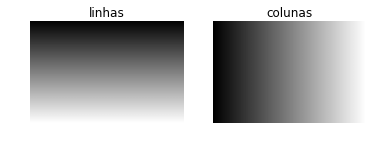

In [53]:
# Diretiva para mostrar gráficos inline no notebook
%matplotlib inline 
import matplotlib.pylab as plt
r,c = np.indices( (200, 300) )
plt.subplot(121)
plt.imshow(r,cmap = 'gray')
plt.title("linhas")
plt.axis('off')
plt.subplot(122)
plt.imshow(c,cmap = 'gray')
plt.axis('off')
plt.title("colunas")

Soma
----
Função soma: $f(r,c) = r + c$:

(-0.5, 299.5, 199.5, -0.5)

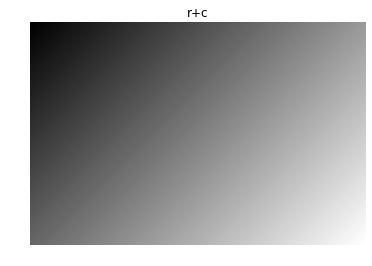

In [55]:
f = r + c
plt.imshow(f,cmap = 'gray')
plt.title("r+c")
plt.axis("off")

Subtração
---------
Função subtração $f(r,c) = r - c$:

(-0.5, 299.5, 199.5, -0.5)

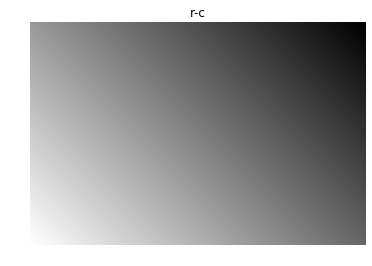

In [56]:
f = r - c
plt.imshow(f,cmap = 'gray')
plt.title("r-c")
plt.axis("off")

Xadrez
------
Função xadrez $f(r,c) = \frac{(r + c)}{8} \% 2$. Aqui foi feita a divisão por 8 para que o tamanho das casas do xadrez fique 8 x 8, caso
contrário é muito difícil de visualizar o efeito xadrez pois a imagem possui muitos pixels.:

(-0.5, 299.5, 199.5, -0.5)

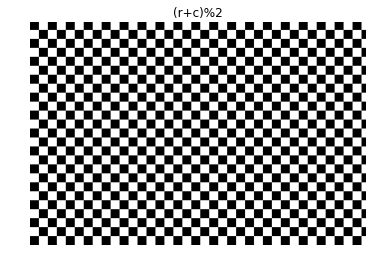

In [57]:
f = (r//8 + c//8) % 2
plt.imshow(f,cmap = 'gray')
plt.title("(r+c)%2")
plt.axis("off")

Reta
----
Ou ainda a função de uma reta $f(r,c) = (r = \frac{1}{2} c)$:

(-0.5, 299.5, 199.5, -0.5)

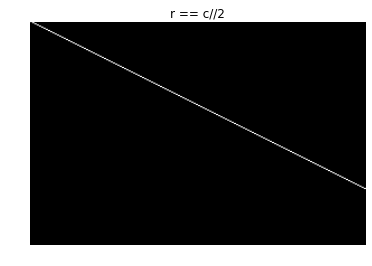

In [58]:
f = (r == c//2)
plt.imshow(f,cmap = 'gray')
plt.title('r == c//2')
plt.axis("off")

Parábola
--------   
Função parabólica: $f(r,c) = r^2 + c^2$:

(-0.5, 299.5, 199.5, -0.5)

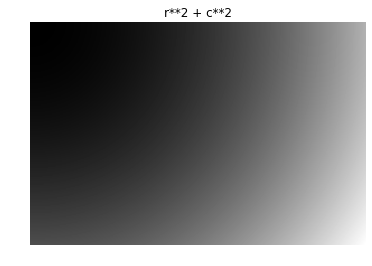

In [59]:
f = r**2 + c**2
plt.imshow(f,cmap = 'gray')
plt.title('r**2 + c**2')
plt.axis("off")

Círculo
-------
Função do círculo de raio 190, $f(r,c) = (r^2 + c^2 < 190^2)$:

(-0.5, 299.5, 199.5, -0.5)

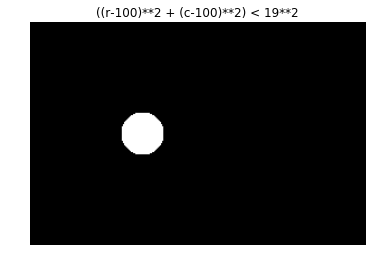

In [63]:
f = (((r-100)**2 + (c-100)**2) < 19**2)
plt.imshow(f,cmap = 'gray')
plt.title('((r-100)**2 + (c-100)**2) < 19**2')
plt.axis("off")

Meshgrid
========
   
A função *meshgrid* é semelhante à  função *indices* visto
anteriormente, porém, enquanto *indices* gera as coordenadas inteiras não negativas a partir de um *shape(H,W)*, 
o *meshgrid* gera os valores das matrizes a partir de dois vetores de valores reais quaisquer, um para as linhas e outro para as colunas.

Veja a seguir um pequeno exemplo numérico. Para que o *meshgrid* fique compatível com a nossa convenção de (linhas,colunas), deve-se
usar o parâmetro *indexing='ij'*.

In [64]:
import numpy as np
r, c = np.meshgrid( np.array([-1.5, -1.0, -0.5, 0.0, 0.5]), np.array([-20, -10, 0, 10, 20, 30]), indexing='ij')
print 'r=\n',r
print 'c=\n',c

r=
[[-1.5 -1.5 -1.5 -1.5 -1.5 -1.5]
 [-1.  -1.  -1.  -1.  -1.  -1. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [ 0.   0.   0.   0.   0.   0. ]
 [ 0.5  0.5  0.5  0.5  0.5  0.5]]
c=
[[-20 -10   0  10  20  30]
 [-20 -10   0  10  20  30]
 [-20 -10   0  10  20  30]
 [-20 -10   0  10  20  30]
 [-20 -10   0  10  20  30]]


Gerando os vetores com linspace
================================

A função *linspace* gera vetor em ponto flutuante recebendo os parâmetro de valor inicial, valor final e número de pontos do vetor.
Desta forma ele é bastante usado para gerar os parâmetro para o *meshgrid*.
 
Repetindo os mesmos valores do exemplo anterior, porém usando *linspace*. Observe que o primeiro vetor possui 5 pontos,
começando com valor -1.5 e o valor final é 0.5 (inclusive). O segundo vetor possui 6 pontos, começando de -20 até 30:

In [66]:
rows = np.linspace(-1.5, 0.5, 5)
cols = np.linspace(-20, 30, 6)

print 'rows:', rows
print 'cols:', cols

rows: [-1.5 -1.  -0.5  0.   0.5]
cols: [-20. -10.   0.  10.  20.  30.]


Usando os dois vetores gerados pelo *linspace* no *meshgrid*:

In [68]:
r, c = np.meshgrid(rows, cols, indexing='ij')
print 'r = \n', r
print 'c = \n', c

r = 
[[-1.5 -1.5 -1.5 -1.5 -1.5 -1.5]
 [-1.  -1.  -1.  -1.  -1.  -1. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [ 0.   0.   0.   0.   0.   0. ]
 [ 0.5  0.5  0.5  0.5  0.5  0.5]]
c = 
[[-20. -10.   0.  10.  20.  30.]
 [-20. -10.   0.  10.  20.  30.]
 [-20. -10.   0.  10.  20.  30.]
 [-20. -10.   0.  10.  20.  30.]
 [-20. -10.   0.  10.  20.  30.]]


Podemos agora gerar uma matriz ou imagem que seja função destes valores. Por exemplo ser o produto deles:

In [69]:
f = r * c
print 'f=\n', f

f=
[[ 30.  15.  -0. -15. -30. -45.]
 [ 20.  10.  -0. -10. -20. -30.]
 [ 10.   5.  -0.  -5. -10. -15.]
 [ -0.  -0.   0.   0.   0.   0.]
 [-10.  -5.   0.   5.  10.  15.]]


Exemplo na geração da imagem sinc com meshgrid
==============================================

Neste exemplo, geramos a imagem da função $sinc(r,c)$ em duas dimensões, nos intervalos na vertical, de -5 a 5 e na
horizontal de -6 a 6. A função sinc é uma função trigonométrica que pode ser utilizada para filtragens.
A equação é dada por:

$$ sinc(r,c) = \frac{\sin(r^2 + c^2)}{r^2 + c^2}, \text{para\ } -5 \leq r \leq 5, -6 \leq c \leq 6
$$

Na origem, tanto r como c são zeros, resultando uma divisão por zero. Entretanto pela teoria dos limites, $\frac{sin(x)}{x}$ é
igual a 1 quando $x$ é igual a zero.
Uma forma de se obter isto em ponto flutuante é somar tanto no numerador como no denominador um *epsilon*, que é a
menor valor em ponto flutuante. Epsilon pode ser obtido pela função *np.spacing*. 

(-0.5, 179.5, 149.5, -0.5)

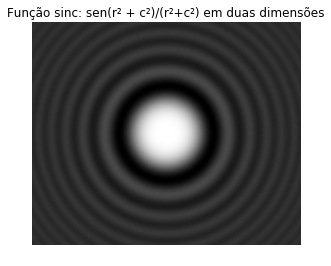

In [72]:
e = np.spacing(1) # epsilon to avoid 0/0
rows = np.linspace(-5.0, 5.0, 150) # coordenadas das linhas
cols = np.linspace(-6.0, 6.0, 180) # coordenadas das colunas
r, c = np.meshgrid(rows, cols, indexing='ij') # Grid de coordenadas estilo numpy
z = np.sin(r**2 + c**2 + e) / (r**2 + c**2 + e) # epsilon is added to avoid 0/0
plt.imshow(z,cmap = 'gray')
plt.title('Função sinc: sen(r² + c²)/(r²+c²) em duas dimensões')
plt.axis("off")

Exemplo na geração da imagem sinc com indices
==============================================

Outra forma de gerar a mesma imagem, usando a função *indices* é processar os
indices de modo a gerar os mesmos valores relativos à grade de espaçamento regular
acima, conforme ilustrado abaixo:

(-0.5, 179.5, 149.5, -0.5)

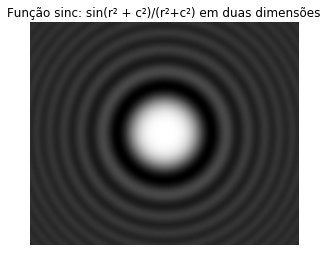

In [73]:
n_rows = len(rows)
n_cols = len(cols)
r,c = np.indices((n_rows,n_cols))
r = -5. + 10.*r.astype(float)/(n_rows-1)
c = -6. + 12.*c.astype(float)/(n_cols-1)
zi = np.sin(r**2 + c**2 + e) / (r**2 + c**2 + e) # epsilon is addes to avoid 0/0
plt.imshow(zi,cmap = 'gray')
plt.title('Função sinc: sin(r² + c²)/(r²+c²) em duas dimensões')
plt.axis("off")

Verificando que as duas funções são iguais:

In [74]:
print 'Máxima diferença entre z e zi?', abs(z - zi).max()

Máxima diferença entre z e zi? 1.38777878078e-15


Para usuários avançados
========================

Na realidade a função *indices* retorna um único array n-dimensional com uma dimensão a mais que o indicado pelo
shape usado como parâmetro. Assim, quando é feito *r,c = np.indices((rows,cols))*, r é atribuído para o elemento 0 e
c é atribuído para o elemento 1 do ndarray. No caso do *meshgrid*, ele retorna tantos arrays quanto forem o número
de vetores passados como parâmetro para *meshgrid*.


Tile
==================


Uma função importante da biblioteca numpy é a tile, que gera repetições
do array passado com parâmetro. A quantidade de repetições é dada pelo 
parâmetro reps

Exemplo unidimensional - replicando as colunas
====================================================

In [75]:
a = np.array([0, 1, 2])
print 'a = \n', a

print
print 'Resultado da operação np.tile(a,2): \n',np.tile(a,2)

a = 
[0 1 2]

Resultado da operação np.tile(a,2): 
[0 1 2 0 1 2]


Exemplo unidimensional - replicando as linhas
====================================================

Para modificar as dimensões na quais a replicação será realizada
modifica-se o parâmetro reps, passando ao invés de um int, uma tupla
com as dimensões que se deseja alterar

In [76]:
a = np.array([0, 1, 2])
print 'a = \n', a

print
print 'Resultado da operação np.tile(a,(2,1)): \n',np.tile(a,(2,1))

a = 
[0 1 2]

Resultado da operação np.tile(a,(2,1)): 
[[0 1 2]
 [0 1 2]]


Exemplo bidimensional - replicando as colunas
==================================================

In [77]:
a = np.arange(4).reshape(2,2)
print 'a = \n', a

print
print 'Resultado da operação np.tile(a,2): \n',np.tile(a,2)

a = 
[[0 1]
 [2 3]]

Resultado da operação np.tile(a,2): 
[[0 1 0 1]
 [2 3 2 3]]


Exemplo bidimensional - replicando as linhas
==================================================

In [79]:
a = np.arange(4).reshape(2,2)
print 'a = \n', a

print
print 'Resultado da operação np.tile(a,(3,1)): \n',np.tile(a,(3,1))

a = 
[[0 1]
 [2 3]]

Resultado da operação np.tile(a,(3,1)): 
[[0 1]
 [2 3]
 [0 1]
 [2 3]
 [0 1]
 [2 3]]


Exemplo bidimensional - replicando as linhas e colunas simultaneamente
=============================================================

In [80]:
a = np.arange(4).reshape(2,2)
print 'a = \n', a

print
print 'Resultado da operação np.tile(a,(2,2)): \n',np.tile(a,(2,2))

a = 
[[0 1]
 [2 3]]

Resultado da operação np.tile(a,(2,2)): 
[[0 1 0 1]
 [2 3 2 3]
 [0 1 0 1]
 [2 3 2 3]]


Resize
=======


A função *np.resize* recebe um array  *a* e retorna um array com o shape desejado. Caso o novo array
seja maior que o array original o novo array é preenchido com cópias de *a*. 

In [81]:
a = np.array([[0,1],[2,3]])

print 'a = \n', a   
print

print 'np.resize(a,(1,7)) = \n', np.resize(a,(1,7))
print

print
print 'np.resize(a,(2,5)) = \n', np.resize(a,(2,5))

a = 
[[0 1]
 [2 3]]

np.resize(a,(1,7)) = 
[[0 1 2 3 0 1 2]]


np.resize(a,(2,5)) = 
[[0 1 2 3 0]
 [1 2 3 0 1]]


Clip
======


A função clip substitui os valores de um array que estejam abaixo de um limiar mínimo ou que estejam acima de um limiar máximo,
por esses limiares mínimo e máximo, respectivamente. Esta função é especialmente útil em processamento de imagens para evitar 
que os índices ultrapassem os limites das imagens.

Exemplos
========

In [82]:
a = np.array([11,1,2,3,4,5,12,-3,-4,7,4])
print 'a = ',a
print 'np.clip(a,0,10) = ', np.clip(a,0,10)

a =  [11  1  2  3  4  5 12 -3 -4  7  4]
np.clip(a,0,10) =  [10  1  2  3  4  5 10  0  0  7  4]


Formatando arrays para impressão
=================================

Imprimindo arrays de ponto flutuante
=======================================

Ao se imprimir arrays com valores em ponto flutuante, o NumPy em geral, imprime o array com muitas as casas
decimais e com notação científica, o que dificulta a visualização.

In [84]:
A = np.exp(np.linspace(0.1,10,32)).reshape(4,8)/3000.
print 'A: \n', A

A: 
[[  3.68390306e-04   5.06993321e-04   6.97744275e-04   9.60263289e-04
    1.32155235e-03   1.81877265e-03   2.50306691e-03   3.44481975e-03]
 [  4.74089730e-03   6.52461051e-03   8.97942724e-03   1.23578432e-02
    1.70073529e-02   2.34061923e-02   3.22125283e-02   4.43321564e-02]
 [  6.10116684e-02   8.39666729e-02   1.15558259e-01   1.59035850e-01
    2.18871431e-01   3.01219527e-01   4.14550236e-01   5.70520443e-01]
 [  7.85172815e-01   1.08058591e+00   1.48714510e+00   2.04666794e+00
    2.81670543e+00   3.87646151e+00   5.33493976e+00   7.34215526e+00]]


É possível diminuir o número de casas decimais e suprimir a notação exponencial utilizando
a função **set_printoption** do numpy:

In [86]:
np.set_printoptions(suppress=True, precision=3)

print 'A: \n', A

A: 
[[ 0.     0.001  0.001  0.001  0.001  0.002  0.003  0.003]
 [ 0.005  0.007  0.009  0.012  0.017  0.023  0.032  0.044]
 [ 0.061  0.084  0.116  0.159  0.219  0.301  0.415  0.571]
 [ 0.785  1.081  1.487  2.047  2.817  3.876  5.335  7.342]]


Imprimindo arrays binários
============================

Array booleanos são impressos com as palavras **True** e **False**, como no exemplo a seguir:

In [87]:
A = np.random.rand(5,10) > 0.5
print 'A = \n', A

A = 
[[ True False False  True False False False  True  True False]
 [ True False  True  True  True False  True  True  True False]
 [False  True  True False  True False  True  True  True  True]
 [False  True  True  True  True False False False False False]
 [ True False False  True False  True  True  True False  True]]


Para facilitar a visualização destes arrays, é possível converter os valores para inteiros utilizando
o método **astype(int)**:

Exemplo com ponto flutuante
=============================

Observe que se os parâmetros do clip estiverem em ponto flutuante, o resultado também será em ponto flutuante:



In [91]:
a = np.arange(10).astype(np.int)
print 'a=',a
print 'np.clip(a,2.5,7.5)=',np.clip(a,2.5,7.5)

a= [0 1 2 3 4 5 6 7 8 9]
np.clip(a,2.5,7.5)= [ 2.5  2.5  2.5  3.   4.   5.   6.   7.   7.5  7.5]
